### aim: 

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

Text(0.5, 0.98, 'ocean regions, subdivided, with atlantic mask')

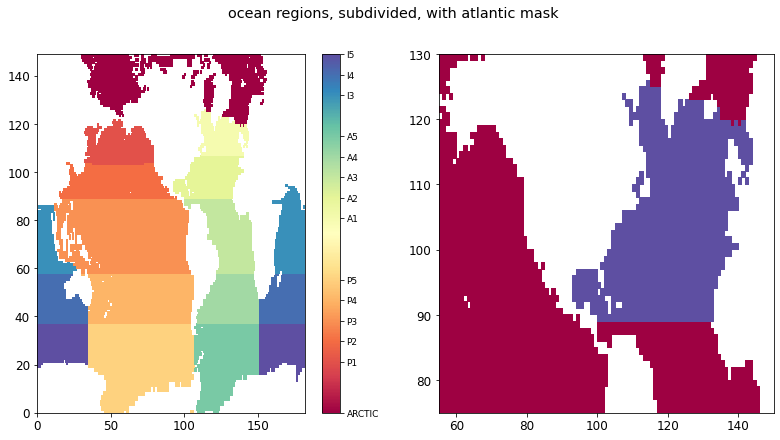

In [6]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

masknoATL = np.copy(maskno)

masknoATL[np.where(masknoATL == 2.6) ]= 5
masknoATL[np.where(masknoATL == 2.4) ]= 5
masknoATL[masknoATL < 5] = 0


maskno_broad = np.zeros([31,149,182])
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

for i in range(0,31):
        maskno_broad[i,:,:] = maskno
        
maskno_broad = maskno_broad.astype('float')
tmesh_float = tmesh.tmask[0,:,:,:].values.astype('float')
  
        
maskno_broad =  maskno_broad * tmesh_float
maskno_broad[maskno_broad == 0] = np.nan    

masknoATL_broad = np.copy(maskno_broad)
masknoATL_broad[np.where(masknoATL_broad == 2.6) ]= 5
masknoATL_broad[np.where(masknoATL_broad == 2.4) ]= 5
masknoATL_broad[masknoATL_broad < 5] = 0

#####

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

w = axs[1].pcolor(masknoATL, cmap = tcm, vmin = 0.5, vmax = 4)
axs[1].set_xlim([55,150])
axs[1].set_ylim([75,130])
plt.suptitle('ocean regions, subdivided, with atlantic mask')

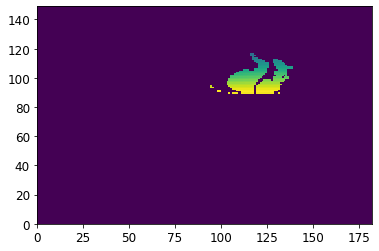

In [31]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,:,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'] = tmesh['csize'].where(masknoATL_broad == 5, 0)

plt.pcolormesh(tmesh.csize[27,:,:])

In [27]:
tmesh

<xarray.Dataset>
Dimensions:       (t: 1, x: 182, y: 149, z: 31)
Dimensions without coordinates: t, x, y, z
Data variables: (12/45)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
    csize         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000

[  4.9999378   15.00028841  25.00175946  35.0054128   45.01331662
  55.02949901  65.06180502  75.12551243  85.25036944  95.49428432
 105.96992049 116.89623778 128.69790307 142.19524676 158.96061456
 181.96278352 216.64791899]

[ 272.4767218   364.30304026  511.53476547  732.20085553 1033.21734145]

[1405.69747945 1830.88500209 2289.76791732 2768.24234033 3257.47886166]

[3752.44220334 4250.40123866 4749.91326561 5250.22661276]



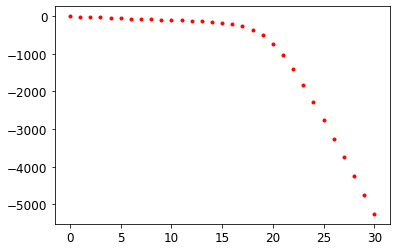

In [51]:
yax = np.squeeze(tmesh.gdept_1d.values)

plt.plot(np.arange(0,31,1),-yax, 'r.')
print(yax[0:17])
print('')
print(yax[17:22])
print('')
print(yax[22:27])
print('')
print(yax[27:31])
print('')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,:,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'] = tmesh['csize'].where(masknoATL_broad == 5, 0)
tmesh = tmesh.rename({"z": "deptht"})


def get_atl_c(tmod, yr, tmesh):
    
    savenam = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/ccont/{tmod}_AtlC_{yr}.nc'
    print(savenam)
    
    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/{tmod}/ORCA2_1m_{yr}0101_{yr}1231_ptrc_T.nc')
    
    surf = w.DIC.isel(deptht = slice(0,17)).weighted(tmesh['csize'].isel(deptht = slice(0,17))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L1 = w.DIC.isel(deptht = slice(17,22)).weighted(tmesh['csize'].isel(deptht = slice(17,22))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L2 = w.DIC.isel(deptht = slice(22,27)).weighted(tmesh['csize'].isel(deptht = slice(22,27))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L3 = w.DIC.isel(deptht = slice(27,31)).weighted(tmesh['csize'].isel(deptht = slice(27,31))).\
    mean(dim = ['x','y','deptht']).values *1e6

    # plt.figure()
    # ts = np.arange(1,13,1)
    # plt.plot(ts,surf)
    # plt.plot(ts,L1)
    # plt.plot(ts,L2)
    # plt.plot(ts,L3)

    times = pd.date_range(f"{yr}/01/01",f"{yr+1}/01/01",freq='MS',closed='left')
    data_vars = {'surf_DIC':(['time_counter'], surf,
    {'units': 'umol/L',
    'long_name':'levels 0:17 (python counting)'}),

                 'L1':(['time_counter'], L1,
    {'units': 'umol/L',
    'long_name':'levels 17:22 (python counting)'}),

                 'L2':(['time_counter'], L2,
    {'units': 'umol/L',
    'long_name':'levels 22:27 (python counting)'}),

                 'L3':(['time_counter'], L3,
    {'units': 'umol/L',
    'long_name':'levels 27:bottom (python counting)'}),

                }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),
            }
    # define global attributes
    attrs = {'made in':'AMOC-PLANKTOM/carbon-content-atl.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

In [53]:
extract = False

if extract:
    for yr in range(1957,2023):

        get_atl_c('TOM12_TJ_RVA0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVB0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVC0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVD0', yr, tmesh)

In [57]:
def make_yearlist(yrst, yrend, tr):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/ccont/{tr}_AtlC_{yrs[i]}.nc'
        ylist.append(ty)
    return ylist

A_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVA0'))
B_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVB0'))
C_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVC0'))
D_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVD0'))


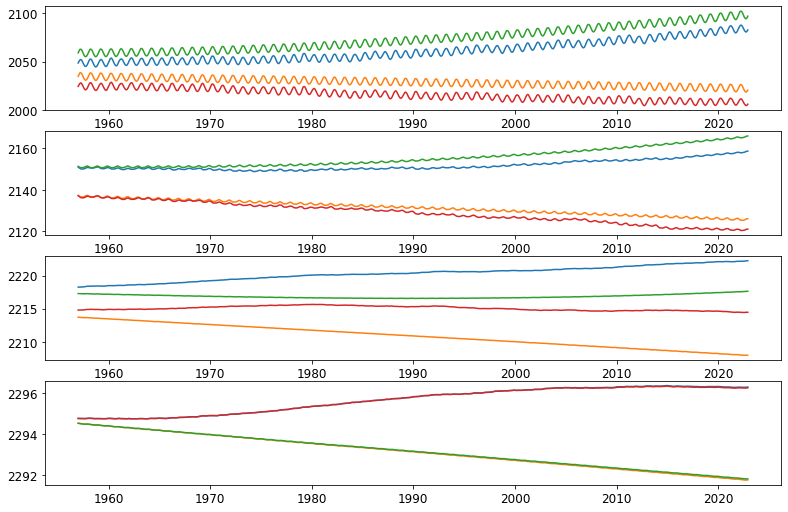

In [62]:
fact = 1.1
fig, axs = plt.subplots(4,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
axs[ind].plot(A_AtlC.time_counter, A_AtlC.surf_DIC, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.surf_DIC, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.surf_DIC, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.surf_DIC, label = 'D')

ind = 1
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L1, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L1, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L1, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L1, label = 'D')

ind = 2
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L2, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L2, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L2, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L2, label = 'D')

ind = 3
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L3, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L3, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L3, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L3, label = 'D')